# Fashion Mnist 

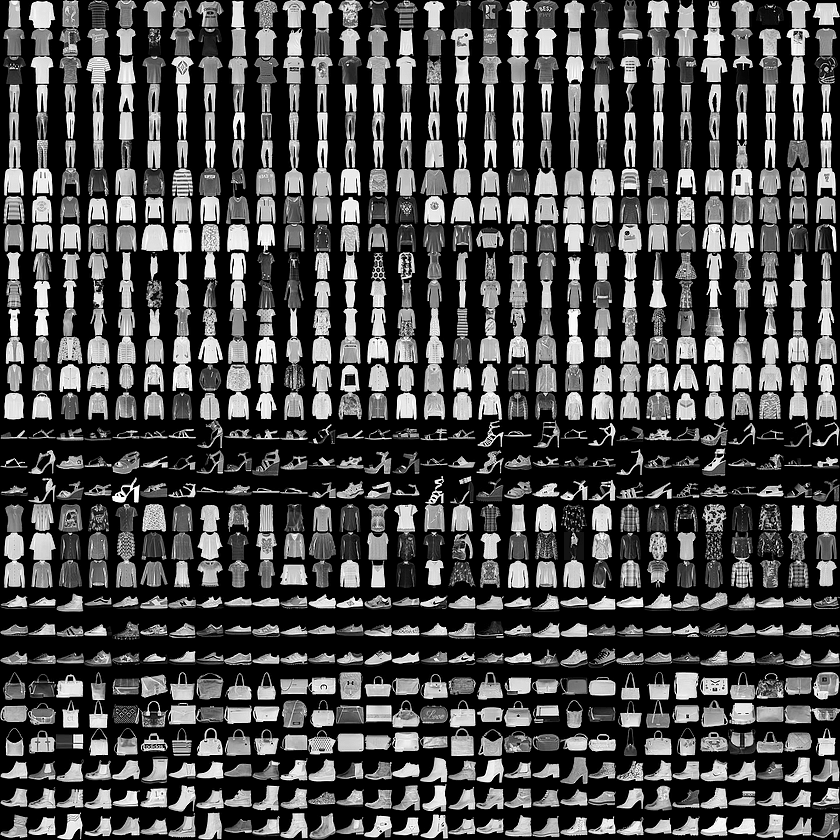

In [5]:
from IPython.display import Image
Image("./fmnist.png")

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import random 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score
import xgboost
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Explore the data

In [7]:
test=pd.read_csv(r'/Users/idobar/Documents/GitHub/FirstFinal/fashion-mnist_test.csv')
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [8]:
train=pd.read_csv(r'/Users/idobar/Documents/GitHub/FirstFinal/fashion-mnist_train.csv')
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [87]:
test.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Lets see how many missing values exists


In [9]:
print("Number of missing values in the test set:",test.isnull().any().sum())

Number of missing values in the test set: 0


In [10]:
print("Number of missing values in the train set:",train.isnull().any().sum())

Number of missing values in the train set: 0


The data is ready for work 

###### Lets show some information about the data
 

In [11]:
# Counter for each label
label_counter=train["label"].value_counts()

# Total number of labels
total_labels=len(train)

# Lets make dictionary for all the labels
labels={0:"T-shirt/top" , 1:"Trouser" , 2:"Pullover" , 3:"Dress" , 4:"Coat" , 
        5:"Sandal" , 6:"Shirt" , 7:"Sneaker" , 8:"Bag" , 9:"Ankle Boot"}

for i in range(len(label_counter)):
    label=labels[label_counter.index[i]]
    counter=label_counter.values[i]
    precent=(counter/total_labels)*100
    print("{:<15s}: has {} samples which is {}% of the data.".format(label, counter, precent))

T-shirt/top    : has 6000 samples which is 10.0% of the data.
Trouser        : has 6000 samples which is 10.0% of the data.
Pullover       : has 6000 samples which is 10.0% of the data.
Dress          : has 6000 samples which is 10.0% of the data.
Coat           : has 6000 samples which is 10.0% of the data.
Sandal         : has 6000 samples which is 10.0% of the data.
Shirt          : has 6000 samples which is 10.0% of the data.
Sneaker        : has 6000 samples which is 10.0% of the data.
Bag            : has 6000 samples which is 10.0% of the data.
Ankle Boot     : has 6000 samples which is 10.0% of the data.


In [12]:
test.shape

(10000, 785)

In [13]:
train.shape

(60000, 785)

In [14]:
train_arr = np.array(train,dtype='float32')
test_arr = np.array(test,dtype = 'float32')

<B> Lets show some random image

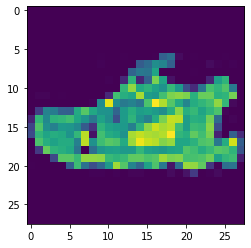

The image is: Sandal


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = random.randint(1,60000)
plt.figure()
plt.imshow(train_arr[i,1:].reshape(28,28))
plt.grid(False)
plt.show()
label = int(train_arr[i,0])
print(f'The image is: {class_names[label]}')

###### Lets show 3 samples from any label

In [16]:
images=[]

for k in labels.keys():
    # Get two samples for each category
    samples = train[train["label"] == k].head(3)
    # Append the samples to the samples list
    for j, s in enumerate(samples.values):
        # First column contain labels, hence index should start from 1
        img = np.array(samples.iloc[j, 1:]).reshape(28,28)
        images.append(img)
        
print("Total number of sample images to plot: ", len(images))

Total number of sample images to plot:  30


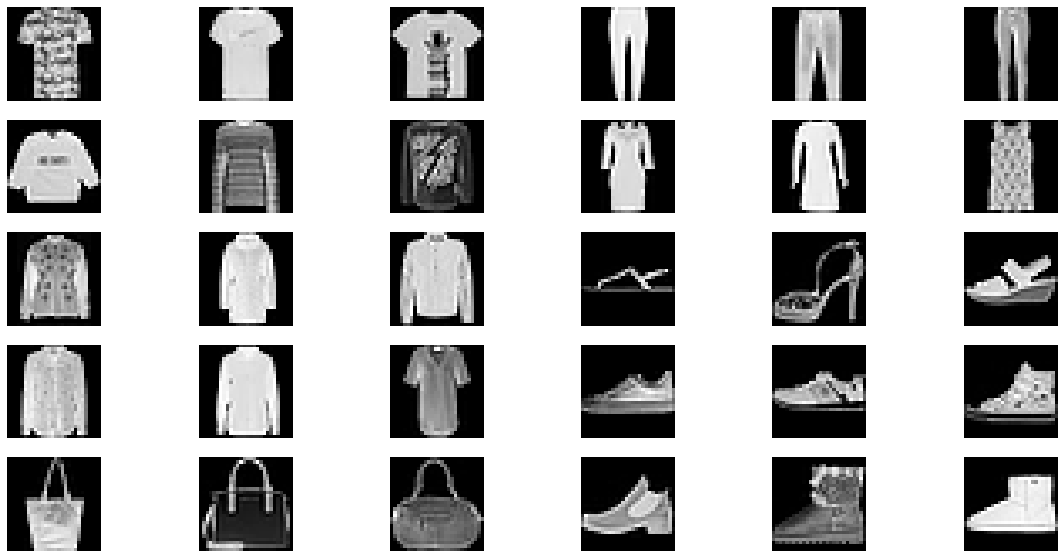

In [17]:
f, ax = plt.subplots(5,6, figsize=(20,10))

for i, img in enumerate(images):
    ax[i//6, i%6].imshow(img, cmap='gray')
    ax[i//6, i%6].axis('off')
plt.show()

## Preprocessing

After showing the data we will split the train set in order to test some models on it before
testing the real test set


In [18]:
train_labels = train["label"]
test_labels = test["label"]

# Drop the labels column from train dataframe as well as test dataframe
train = train.drop(["label"], axis =1)
test = test.drop(["label"], axis=1)

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, train_labels, test_size=0.2, random_state=0)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_valid))

Number of samples in the train set:  48000
Number of samples in the validation set:  12000


Lets plot the new train set 

<AxesSubplot:xlabel='label', ylabel='count'>

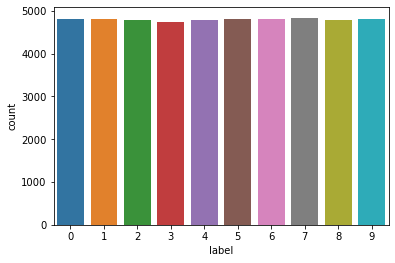

In [19]:
sns.countplot(y_train)

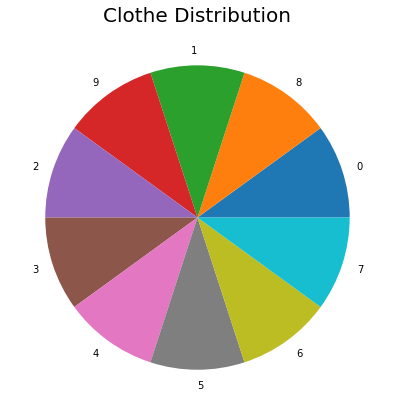

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize=(7, 7))
axes= test_labels.value_counts().plot(kind='pie')
axes.set_title("Clothe Distribution", fontsize=20)
axes.set_xlabel("")
axes.set_ylabel("")
fig1 = plt.gcf()
plt.show()
plt.draw()

There are 784 columns and each image is 28*28 grayscale image, so we will need to reshape the data.

In [20]:
# Reshaping the data.
X_train = np.array(X_train.iloc[:, :]).reshape(len(X_train),28*28)
X_valid = np.array(X_valid.iloc[:, :]).reshape(len(X_valid), 28*28)
X_test = np.array(test.iloc[:,:]).reshape(len(test), 28*28)

In [21]:
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [22]:
# All the values are between 0-255 , so by dividing the values by 255 we will normalize the value to be between 0-1.
X_train /=255.
X_valid /=255.
X_test /=255.

## Models before the PCA

### KNN 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_pred=neigh.predict(X_valid)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1189
           1       1.00      0.96      0.98      1189
           2       0.74      0.83      0.78      1204
           3       0.90      0.89      0.89      1260
           4       0.79      0.77      0.78      1208
           5       0.99      0.82      0.90      1188
           6       0.68      0.56      0.62      1195
           7       0.87      0.94      0.91      1160
           8       0.98      0.95      0.96      1210
           9       0.89      0.97      0.93      1197

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Accuracy: 0.856


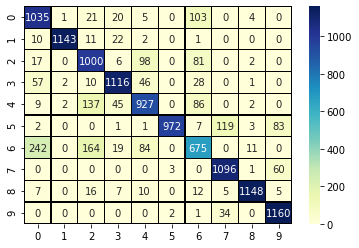

In [24]:
confMatrix = confusion_matrix(y_valid, neigh_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, neigh_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,neigh_pred)
print("Accuracy:",result2)

That's quite nice score for first attempt, let's try more models.

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_valid)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.98      0.96      0.97      1189
           2       0.75      0.78      0.77      1204
           3       0.86      0.87      0.87      1260
           4       0.75      0.78      0.77      1208
           5       0.94      0.94      0.94      1188
           6       0.65      0.57      0.61      1195
           7       0.92      0.93      0.92      1160
           8       0.94      0.94      0.94      1210
           9       0.94      0.94      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy: 0.8544166666666667


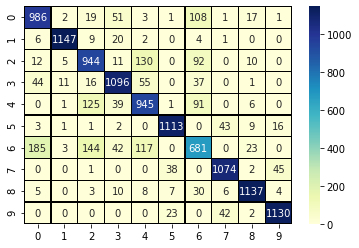

In [26]:
confMatrix = confusion_matrix(y_valid, clf_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, clf_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,clf_pred)
print("Accuracy:",result2)

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_valid)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1189
           1       1.00      0.96      0.98      1189
           2       0.77      0.82      0.80      1204
           3       0.88      0.92      0.90      1260
           4       0.78      0.83      0.80      1208
           5       0.97      0.96      0.96      1188
           6       0.75      0.59      0.66      1195
           7       0.94      0.94      0.94      1160
           8       0.95      0.96      0.96      1210
           9       0.95      0.95      0.95      1197

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

Accuracy: 0.8798333333333334


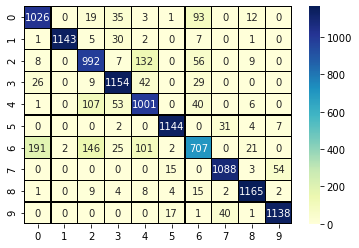

In [28]:
confMatrix = confusion_matrix(y_valid, rf_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, rf_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,rf_pred)
print("Accuracy:",result2)

## Xgboost

In [29]:
import xgboost
xgb=xgboost.XGBClassifier(n_estimators=150,eval_metric='mlogloss')
xgb.fit(X_train,y_train)
xgb_p=xgb.predict(X_valid)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1189
           1       0.99      0.98      0.99      1189
           2       0.83      0.85      0.84      1204
           3       0.91      0.92      0.91      1260
           4       0.84      0.85      0.84      1208
           5       0.98      0.97      0.98      1188
           6       0.75      0.69      0.72      1195
           7       0.95      0.96      0.95      1160
           8       0.97      0.97      0.97      1210
           9       0.96      0.96      0.96      1197

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy: 0.90125


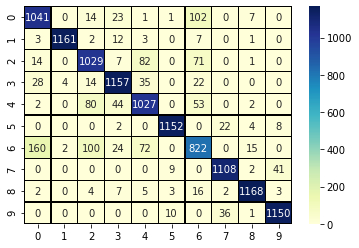

In [30]:
confMatrix = confusion_matrix(y_valid, xgb_p)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, xgb_p,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,xgb_p)
print("Accuracy:",result2)

### Soft Voting

In [49]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Logistic Regression', clf),
               ('KNN', neigh),
               ('Xgboost', xgb),             
               ('Random Forest', rf)]
for c_name, c in classifiers:
    c.fit(X_train, y_train)
    preds = c.predict(X_valid)
    print(f'{c_name} accuracy: {accuracy_score(y_valid, preds)*100}')

Logistic Regression accuracy: 85.44166666666668
KNN accuracy: 85.6
Xgboost accuracy: 90.125
Random Forest accuracy: 87.98333333333333


In [51]:
VC_soft = VotingClassifier(estimators=classifiers, voting='soft')
VC_soft.fit(X_train, y_train)
preds = VC_soft.predict(X_valid)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1189
           1       1.00      0.97      0.98      1189
           2       0.80      0.85      0.83      1204
           3       0.91      0.92      0.92      1260
           4       0.82      0.85      0.83      1208
           5       0.99      0.96      0.97      1188
           6       0.76      0.65      0.70      1195
           7       0.94      0.95      0.95      1160
           8       0.97      0.97      0.97      1210
           9       0.95      0.96      0.96      1197

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Accuracy: 0.89625


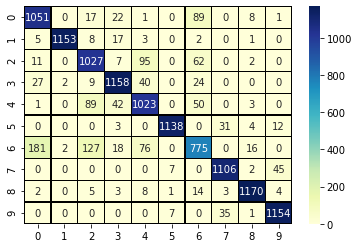

In [52]:
confMatrix = confusion_matrix(y_valid, preds)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, preds,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,preds)
print("Accuracy:",result2)

### Hard Voting

In [53]:
VC_hard = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard.fit(X_train, y_train)
preds = VC_hard.predict(X_valid)

In [54]:
hard_vc_pca = accuracy_score(y_valid, preds)*100
print(f'Hard Voting Classifier score: {hard_vc_pca}')

Hard Voting Classifier score: 88.97500000000001


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1189
           1       0.99      0.97      0.98      1189
           2       0.77      0.87      0.82      1204
           3       0.90      0.92      0.91      1260
           4       0.81      0.82      0.82      1208
           5       0.97      0.97      0.97      1188
           6       0.78      0.58      0.66      1195
           7       0.95      0.96      0.95      1160
           8       0.97      0.96      0.96      1210
           9       0.96      0.96      0.96      1197

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Accuracy: 0.88975


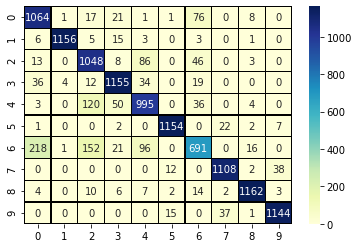

In [55]:
confMatrix = confusion_matrix(y_valid, preds)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, preds,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,preds)
print("Accuracy:",result2)

Let's take look at the results:
* We got score of 0.856 with knn.
* we got score of 0.854 with logistic regression.
* The random forest classifier gave us score of 0.879.
* We got the best result with the XGBOOST that has 90.125

<B> In order to get better results we will do PCA.

## Models with PCA

<B> PCA is actually a very important tool for dimensionality reduction of large data sets, by transforming the large set of variables into a smaller one that still contains most of the information in the large set.
Reducing the number of components or features may cost the accuracy,but it makes the large data set simpler, easy to explore and visualize. Also, it reduces the complexity of the model which makes the algorithms run faster.


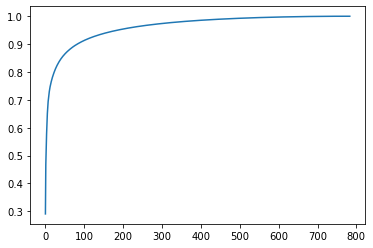

In [56]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
sum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum)

In [57]:
pca=PCA(n_components=0.9505)
X_trainreduce=pca.fit_transform(X_train)
X_validreduce=pca.transform(X_valid)

In [58]:
pca.n_components_

188

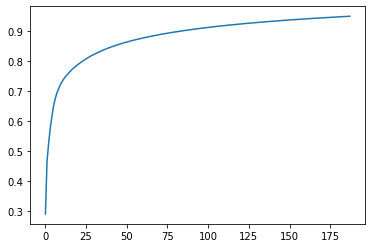

In [59]:
sum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum)

In [60]:
X_train_pca=pd.DataFrame(X_trainreduce)
X_valid_pca=pd.DataFrame(X_validreduce)

### KNN after PCA

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neighpca = KNeighborsClassifier(n_neighbors=5)
neighpca.fit(X_train_pca, y_train)
neighpca_pred=neighpca.predict(X_valid_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1189
           1       0.99      0.97      0.98      1189
           2       0.75      0.80      0.77      1204
           3       0.91      0.89      0.90      1260
           4       0.77      0.78      0.77      1208
           5       0.99      0.87      0.93      1188
           6       0.69      0.59      0.63      1195
           7       0.90      0.95      0.93      1160
           8       0.98      0.95      0.97      1210
           9       0.91      0.97      0.94      1197

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Accuracy: 0.8634166666666667


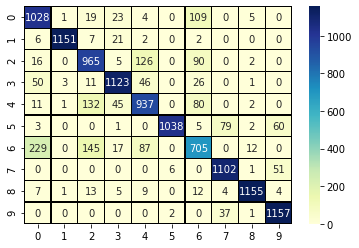

In [62]:
confMatrix = confusion_matrix(y_valid, neighpca_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, neighpca_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,neighpca_pred)
print("Accuracy:",result2)

### Logistic Regression after PCA 

In [63]:
from sklearn.linear_model import LogisticRegression
clfpca = LogisticRegression(random_state=0)
clfpca.fit(X_train_pca,y_train)
clfpca_pred=clfpca.predict(X_valid_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1189
           1       0.98      0.97      0.97      1189
           2       0.75      0.77      0.76      1204
           3       0.86      0.87      0.87      1260
           4       0.76      0.77      0.76      1208
           5       0.94      0.94      0.94      1188
           6       0.64      0.58      0.61      1195
           7       0.92      0.92      0.92      1160
           8       0.95      0.94      0.94      1210
           9       0.94      0.95      0.94      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Accuracy: 0.8528333333333333


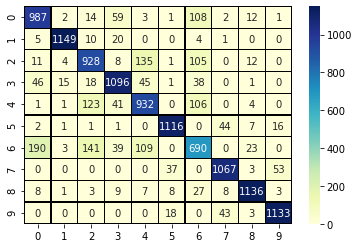

In [64]:
confMatrix = confusion_matrix(y_valid, clfpca_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, clfpca_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,clfpca_pred)
print("Accuracy:",result2)

### Random Forest classifier after PCA

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_pca, y_train)
rf_pred=rf.predict(X_valid_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1189
           1       1.00      0.95      0.97      1189
           2       0.77      0.82      0.79      1204
           3       0.86      0.90      0.88      1260
           4       0.77      0.80      0.78      1208
           5       0.92      0.93      0.93      1188
           6       0.72      0.56      0.63      1195
           7       0.92      0.91      0.92      1160
           8       0.94      0.95      0.94      1210
           9       0.93      0.94      0.94      1197

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Accuracy: 0.8619166666666667


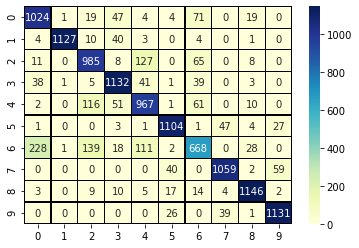

In [66]:
confMatrix = confusion_matrix(y_valid, rf_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, rf_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,rf_pred)
print("Accuracy:",result2)

### XGBOOST after PCA

In [67]:
import xgboost
xgb_clf=xgboost.XGBClassifier(n_estimators=150, eval_metric='mlogloss')
xgb_clf.fit(X_train_pca,y_train)
xgb_pred=xgb_clf.predict(X_valid_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1189
           1       0.99      0.97      0.98      1189
           2       0.80      0.83      0.82      1204
           3       0.90      0.91      0.91      1260
           4       0.80      0.84      0.82      1208
           5       0.97      0.95      0.96      1188
           6       0.75      0.67      0.70      1195
           7       0.94      0.95      0.94      1160
           8       0.96      0.96      0.96      1210
           9       0.95      0.96      0.96      1197

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Accuracy: 0.8896666666666667


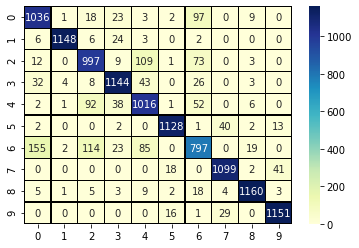

In [68]:
confMatrix = confusion_matrix(y_valid, xgb_pred)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, xgb_pred,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,xgb_pred)
print("Accuracy:",result2)

### Soft Voting with PCA

In [69]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Logistic Regression', clfpca),
               ('KNN', neighpca),
               ('Xgboost', xgb_clf),             
               ('Random Forest', rf)]
for c_name, c in classifiers:
    c.fit(X_train_pca, y_train)
    preds = c.predict(X_valid_pca)
    print(f'{c_name} accuracy: {accuracy_score(y_valid, preds)*100}')

Logistic Regression accuracy: 85.28333333333333
KNN accuracy: 86.34166666666667
Xgboost accuracy: 88.96666666666667
Random Forest accuracy: 86.19166666666666


In [70]:
VC_soft = VotingClassifier(estimators=classifiers, voting='soft')
VC_soft.fit(X_train_pca, y_train)
preds = VC_soft.predict(X_valid_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1189
           1       1.00      0.97      0.98      1189
           2       0.80      0.83      0.81      1204
           3       0.92      0.91      0.91      1260
           4       0.80      0.84      0.82      1208
           5       0.98      0.94      0.96      1188
           6       0.74      0.65      0.69      1195
           7       0.93      0.94      0.94      1160
           8       0.96      0.96      0.96      1210
           9       0.94      0.97      0.95      1197

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Accuracy: 0.8893333333333333


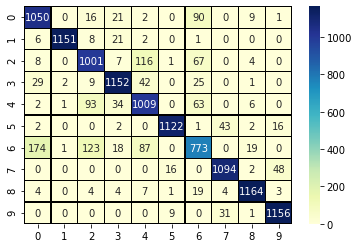

In [71]:
confMatrix = confusion_matrix(y_valid, preds)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(y_valid, preds,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_valid,preds)
print("Accuracy:",result2)

### Hard Voting with PCA 

In [72]:
VC_hard = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard.fit(X_train_pca, y_train)
preds = VC_hard.predict(X_valid_pca)

In [73]:
hard_vc_pca = accuracy_score(y_valid, preds)*100
print(f'Hard Voting Classifier score: {hard_vc_pca}')

Hard Voting Classifier score: 88.275


* We can see clearly that the better results were before we did PCA.
* The only model that gave us better score after the PCA was KNN that gave 0.86, and before the PCA gave 0.856.
* Before the PCA i got 0.854 with Logistic regression, and after the PCA i got 0.852.
* Before the PCA i got 0.9 with xgboost, and after the PCA i got 0.88.
* Before the PCA i got 0.879 with RFC, and after the PCA i got 0.86.

## Cheking the test set on the best model

After a lot of tests on the train valid i want to test the X_test that as been untouched until now.  
I did not touch the test in order to not change the score along the training.

In [74]:
xgb_f=xgb.predict(X_test)
metrics.accuracy_score(test_labels,xgb_f)

0.9089

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.84      0.85      1000
           3       0.91      0.93      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.77      0.72      0.75      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Accuracy: 0.9089


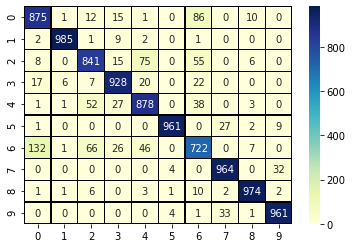

In [84]:
confMatrix = confusion_matrix(test_labels, xgb_f)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(test_labels, xgb_f,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_labels,xgb_f)
print("Accuracy:",result2)

<B> This is the best score of all the models, lets take look at the correlation:
    * There is very strong correlation between 0:"T-shirt/top" and 6:"Shirt", that's very reasonable.
    * There is strong correlation between 2:"Pullover" and 4:"Coat", that's also make some sense.
    * There is strong correlation between 2:"Pullover" and 6:"Shirt".

Now i will check the test set on xgboost after the pca (the best model).

In [75]:
X_testreduce=pca.transform(X_test)

In [76]:
X_testreduce_pca=pd.DataFrame(X_testreduce)

In [85]:
xgb_c=xgb_clf.predict(X_testreduce_pca)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.96      0.94      0.95      1000
           6       0.71      0.68      0.70      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8856


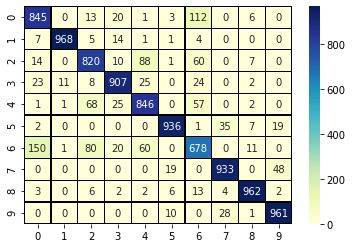

In [86]:
confMatrix = confusion_matrix(test_labels, xgb_c)
sns.heatmap(confMatrix, annot=True, fmt="d",linecolor='black',linewidths=.2,cmap="YlGnBu")
result1 = classification_report(test_labels, xgb_c,zero_division=1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_labels,xgb_c)
print("Accuracy:",result2)

<B> In conclusion we got the best score with the test set.  
    Before the test set the best score was 0.90125 , and with the best model on the test set we got 0.9089.  
    With the xgboost after the dimensionality reduction we got score of 0.8856.
    It is very impressive that we got better results.
    But with the voting classifiers the score was lower, both at the train and test sets.